In [ ]:
'''
In this project mobile users are segmented according to several features
givein in the dataset such as average screen time, average spent on app,
       reveiws, 'Ratings', new password request,
       last visited minutes', and installation/uninstallation of app.
       
I did segmentation analysis and show that there in this data sets users
can be categorized into 6 groups. 

Project website: https://thecleverprogrammer.com/2023/01/30/app-user-segmentation-using-python/
'''


In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# pembe uyarilardan kurtulmak icin: 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("userbehaviour.csv")

In [4]:
df

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed
...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed
995,1996,43.0,61.0,0,6,8,1327,Installed
996,1997,47.0,761.0,0,6,1,1936,Installed
997,1998,6.0,73.0,1,5,1,3436,Installed


In [5]:
df['Status'].unique()

array(['Installed', 'Uninstalled'], dtype=object)

In [7]:
stat = {"Installed":1, "Uninstalled" : 0}
df['Status'] = df['Status'].map(stat)

In [8]:
df

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,1
1,1002,0.0,54.0,0,4,8,24008,0
2,1003,37.0,207.0,0,8,5,971,1
3,1004,32.0,445.0,1,6,2,799,1
4,1005,45.0,427.0,1,5,6,3668,1
...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,1
995,1996,43.0,61.0,0,6,8,1327,1
996,1997,47.0,761.0,0,6,1,1936,1
997,1998,6.0,73.0,1,5,1,3436,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [11]:
df.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

In [12]:
x =df[['Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status']]

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,17.0,634.0,1,9,7,2990,1
1,0.0,54.0,0,4,8,24008,0
2,37.0,207.0,0,8,5,971,1
3,32.0,445.0,1,6,2,799,1
4,45.0,427.0,1,5,6,3668,1
...,...,...,...,...,...,...,...
994,38.0,938.0,0,5,4,1865,1
995,43.0,61.0,0,6,8,1327,1
996,47.0,761.0,0,6,1,1936,1
997,6.0,73.0,1,5,1,3436,1


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average Screen Time         999 non-null    float64
 1   Average Spent on App (INR)  999 non-null    float64
 2   Left Review                 999 non-null    int64  
 3   Ratings                     999 non-null    int64  
 4   New Password Request        999 non-null    int64  
 5   Last Visited Minutes        999 non-null    int64  
 6   Status                      999 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [54]:
model = KMeans(4)
model = model.fit(x)

In [55]:
tahmin = model.predict(x)

In [56]:
x['cluster'] = tahmin

In [57]:
x.head()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,cluster
0,17.0,634.0,1,9,7,2990,1,0
1,0.0,54.0,0,4,8,24008,0,3
2,37.0,207.0,0,8,5,971,1,2
3,32.0,445.0,1,6,2,799,1,2
4,45.0,427.0,1,5,6,3668,1,0


In [45]:
x['cluster'].value_counts()

0    472
4    434
2     27
3     26
5     21
1     19
Name: cluster, dtype: int64

In [46]:
silhouette_score(x,tahmin) 
# score cok fark etmiyor kac gruba ayrimamizin en optimuma yakinligini goruyroz

0.5860617757983406

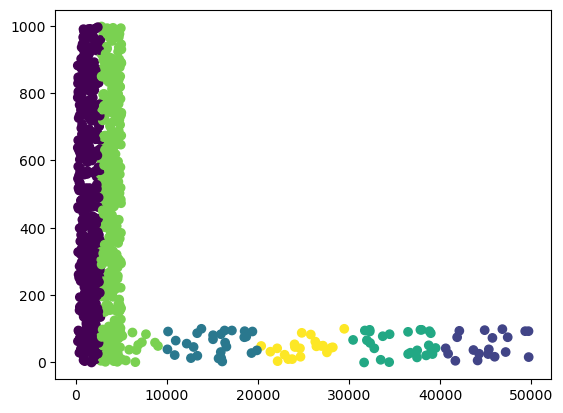

In [53]:
plt.figure()
#plt.scatter(x["Average Screen Time"], x["Average Spent on App (INR)"], c = tahmin)
#plt.scatter(x["Average Screen Time"], x["Average Spent on App (INR)"], c = tahmin)
#plt.scatter(x["Last Visited Minutes"], x["Ratings"], c = tahmin)
plt.scatter(x["Last Visited Minutes"], x["Average Spent on App (INR)"], c = tahmin)

In [48]:
allscore= []
allclusters = []
distances = []
def clust(kactane):
    for i in range(1,kactane):
        i = i+1
        model   = KMeans(i)
        model   = model.fit(x)
        tahmin  = model.predict(x)
        score   = silhouette_score(x,tahmin)
        distance = model.inertia_
        print('cluster ',i," score: ", score)
        allscore.append(score) 
        allclusters.append(i)
        distances.append(distance)

In [49]:
clust(10)

cluster  2  score:  0.9006578891978823
cluster  3  score:  0.866449874967522
cluster  4  score:  0.5802491756408693
cluster  5  score:  0.5864856609144307
cluster  6  score:  0.5859486505394981
cluster  7  score:  0.5889322877676804
cluster  8  score:  0.5105685795389284
cluster  9  score:  0.5152776242767297
cluster  10  score:  0.45544115679057523


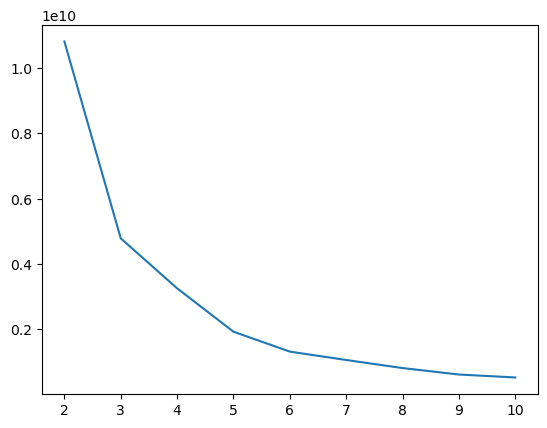

In [50]:
plt.plot(allclusters,distances)

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_data = linkage(x, method = "ward", metric = "euclidean")

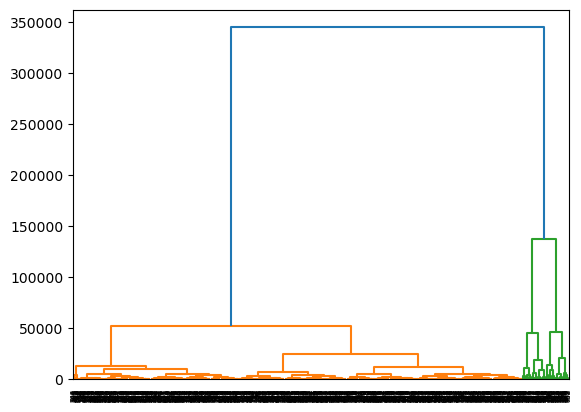

In [40]:
dendrogram(link_data)
plt.show()